In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

**1. Load Data**

In [19]:
# Load datasets
dqn_df = pd.read_csv('dqn.csv')
ddqn_df = pd.read_csv('ddqn.csv')
d3qn_df = pd.read_csv('dueling_dqn.csv')
ftlc_df = pd.read_csv('ftlc.csv')

print(f"  DQN shape:  {dqn_df.shape}")
print(f"  DDQN shape: {ddqn_df.shape}")
print(f"  D3QN shape: {d3qn_df.shape}")
print(f"  FTLC shape: {ftlc_df.shape}")

# Store in dictionary for easier processing
algorithms = {
    'DQN': dqn_df,
    'DDQN': ddqn_df,
    'D3QN': d3qn_df,
    'FTLC': ftlc_df
}


  DQN shape:  (360, 22)
  DDQN shape: (360, 22)
  D3QN shape: (360, 22)
  FTLC shape: (720, 22)


**2. STATISTICAL ANALYSIS**

In [20]:
key_metrics = [
    'system_total_stopped',
    'system_total_waiting_time',
    'system_mean_waiting_time',
    'system_mean_speed'
]

stats_summary = {}
for algo_name, df in algorithms.items():
    stats_summary[algo_name] = {
        'Avg Stopped Vehicles': df['system_total_stopped'].mean(),
        'Total Waiting Time (sec)': df['system_total_waiting_time'].sum(),
        'Avg Waiting Time (sec)': df['system_mean_waiting_time'].mean(),
        'Std Waiting Time': df['system_mean_waiting_time'].std(),
        'Min Waiting Time': df['system_mean_waiting_time'].min(),
        'Max Waiting Time': df['system_mean_waiting_time'].max(),
        'Avg Speed (m/s)': df['system_mean_speed'].mean(),
        'Min Speed': df['system_mean_speed'].min(),
        'Max Speed': df['system_mean_speed'].max(),
    }

stats_df = pd.DataFrame(stats_summary).T
print("\nSystem-Level Performance Statistics:")
print(stats_df.round(4))
stats_df.to_csv('system_statistics.csv')


System-Level Performance Statistics:
      Avg Stopped Vehicles  Total Waiting Time (sec)  Avg Waiting Time (sec)  \
DQN                33.6000                  268029.0                  5.1805   
DDQN               35.8139                  267401.0                  5.5374   
D3QN               29.9417                  229343.0                  4.9513   
FTLC               55.2514                  876529.0                  7.5614   

      Std Waiting Time  Min Waiting Time  Max Waiting Time  Avg Speed (m/s)  \
DQN             3.4333               0.0           15.7670          11.4072   
DDQN            3.2528               0.0           17.5938          10.6966   
D3QN            3.1839               0.0           16.6203          11.5882   
FTLC            4.0155               0.0           25.7748           8.8427   

      Min Speed  Max Speed  
DQN      7.2470    17.5102  
DDQN     7.4040    16.9543  
D3QN     7.7936    17.5190  
FTLC     4.5168    17.1779  


**3. IMPROVEMENT CALCULATION OVER BASELINE**

In [21]:
# Get baseline metrics
ftlc_baseline = {
    'avg_stopped': ftlc_df['system_total_stopped'].mean(),
    'total_waiting': ftlc_df['system_total_waiting_time'].sum(),
    'avg_waiting': ftlc_df['system_mean_waiting_time'].mean(),
    'avg_speed': ftlc_df['system_mean_speed'].mean(),
}

# Calculate improvements for each algorithm
improvements = {}
for algo_name in ['DQN', 'DDQN', 'D3QN']:
    df = algorithms[algo_name]
    improvements[algo_name] = {
        'Stopped Reduction (%)': ((ftlc_baseline['avg_stopped'] - df['system_total_stopped'].mean()) 
                                  / ftlc_baseline['avg_stopped'] * 100),
        'Waiting Time Reduction (%)': ((ftlc_baseline['total_waiting'] - df['system_total_waiting_time'].sum()) 
                                       / ftlc_baseline['total_waiting'] * 100),
        'Avg Wait Reduction (%)': ((ftlc_baseline['avg_waiting'] - df['system_mean_waiting_time'].mean()) 
                                   / ftlc_baseline['avg_waiting'] * 100),
        'Speed Improvement (%)': ((df['system_mean_speed'].mean() - ftlc_baseline['avg_speed']) 
                                  / ftlc_baseline['avg_speed'] * 100),
    }

improvements_df = pd.DataFrame(improvements).T
print("\nPercentage Improvements Over FTLC Baseline:")
print(improvements_df.round(2))
improvements_df.to_csv('improvements_over_baseline.csv')


Percentage Improvements Over FTLC Baseline:
      Stopped Reduction (%)  Waiting Time Reduction (%)  \
DQN                   39.19                       69.42   
DDQN                  35.18                       69.49   
D3QN                  45.81                       73.84   

      Avg Wait Reduction (%)  Speed Improvement (%)  
DQN                    31.49                  29.00  
DDQN                   26.77                  20.97  
D3QN                   34.52                  31.05  


**4. FIGURE 1: System Performance Comparison**

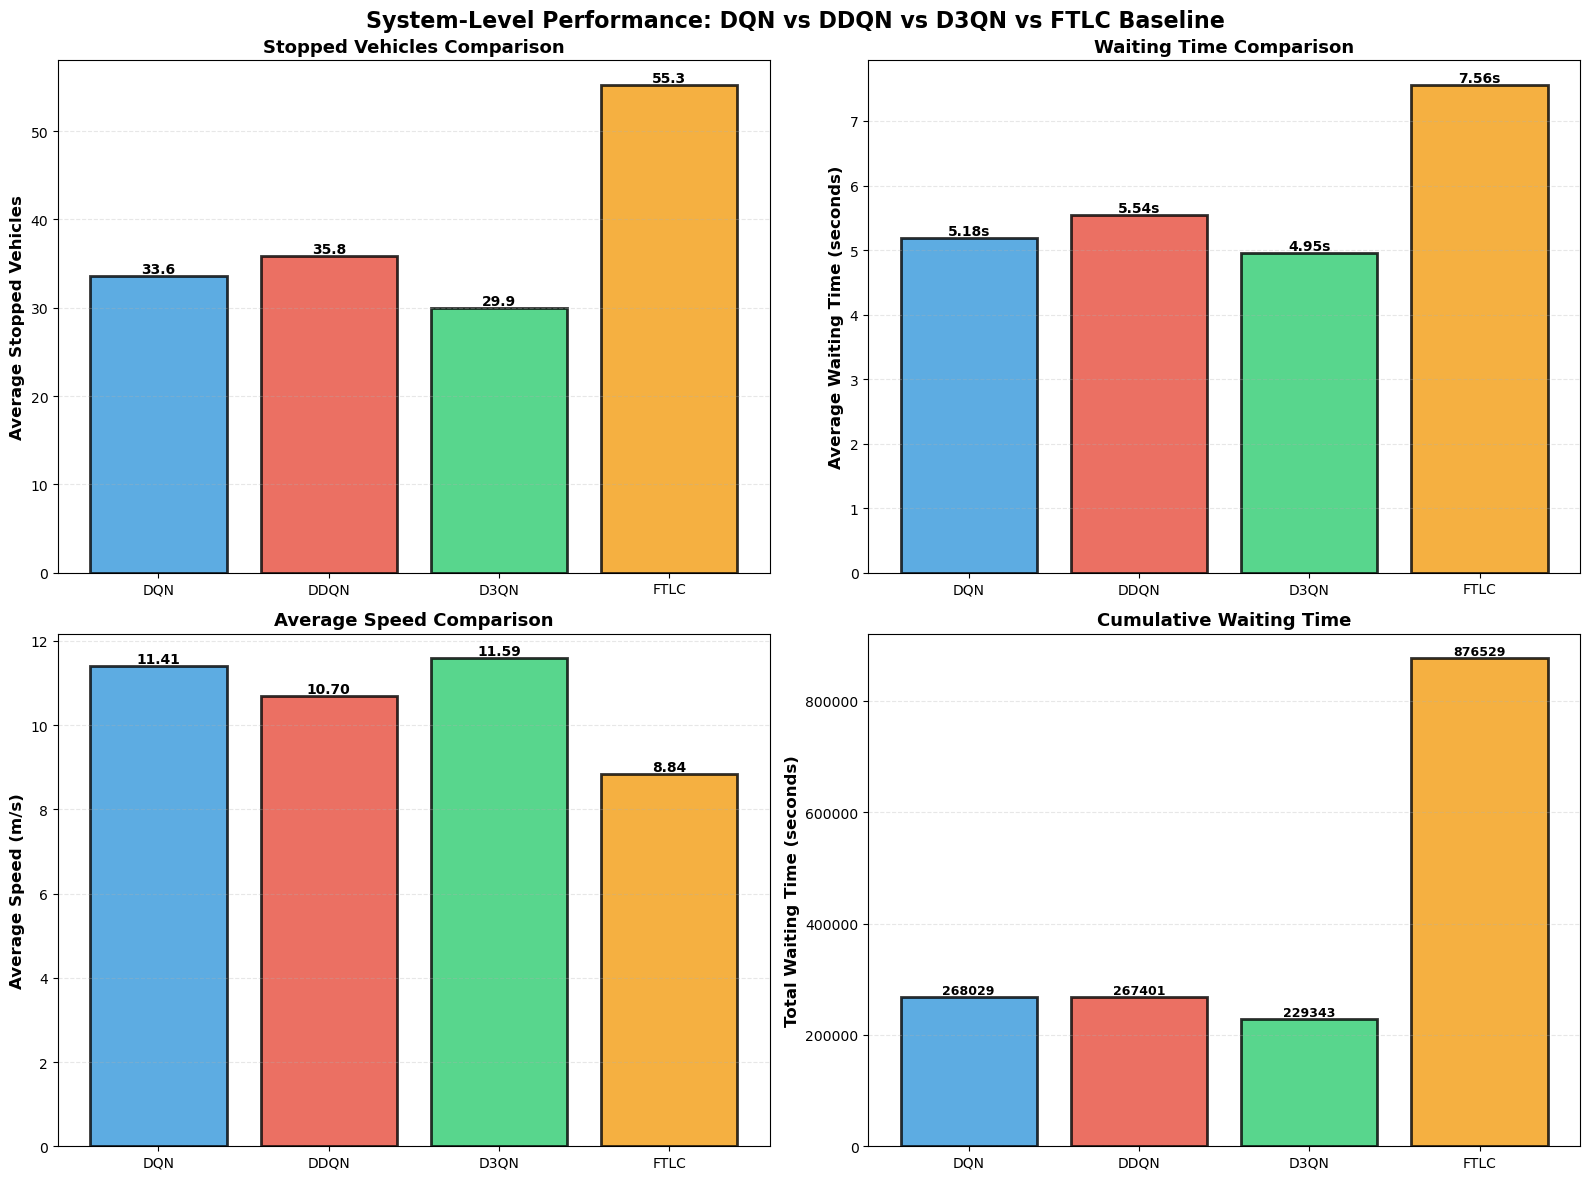

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('System-Level Performance: DQN vs DDQN vs D3QN vs FTLC Baseline', 
             fontsize=16, fontweight='bold')

# 4.1 Average Stopped Vehicles
ax1 = axes[0, 0]
algorithms_list = list(stats_df.index)
stopped_values = stats_df['Avg Stopped Vehicles'].values
colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']
bars1 = ax1.bar(algorithms_list, stopped_values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax1.set_ylabel('Average Stopped Vehicles', fontsize=12, fontweight='bold')
ax1.set_title('Stopped Vehicles Comparison', fontsize=13, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 4.2 Average Waiting Time
ax2 = axes[0, 1]
wait_values = stats_df['Avg Waiting Time (sec)'].values
bars2 = ax2.bar(algorithms_list, wait_values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax2.set_ylabel('Average Waiting Time (seconds)', fontsize=12, fontweight='bold')
ax2.set_title('Waiting Time Comparison', fontsize=13, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}s', ha='center', va='bottom', fontweight='bold')

# 4.3 Average Speed
ax3 = axes[1, 0]
speed_values = stats_df['Avg Speed (m/s)'].values
bars3 = ax3.bar(algorithms_list, speed_values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax3.set_ylabel('Average Speed (m/s)', fontsize=12, fontweight='bold')
ax3.set_title('Average Speed Comparison', fontsize=13, fontweight='bold')
ax3.grid(axis='y', alpha=0.3, linestyle='--')
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold')

# 4.4 Total Waiting Time
ax4 = axes[1, 1]
total_wait = [stats_df.loc['DQN', 'Total Waiting Time (sec)'],
              stats_df.loc['DDQN', 'Total Waiting Time (sec)'],
              stats_df.loc['D3QN', 'Total Waiting Time (sec)'],
              stats_df.loc['FTLC', 'Total Waiting Time (sec)']]
bars4 = ax4.bar(algorithms_list, total_wait, color=colors, alpha=0.8, edgecolor='black', linewidth=2)
ax4.set_ylabel('Total Waiting Time (seconds)', fontsize=12, fontweight='bold')
ax4.set_title('Cumulative Waiting Time', fontsize=13, fontweight='bold')
ax4.grid(axis='y', alpha=0.3, linestyle='--')
for i, bar in enumerate(bars4):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.savefig('01_system_performance_comparison.png', dpi=300, bbox_inches='tight')


**5. FIGURE 2: Percentage Improvements Over Baseline**

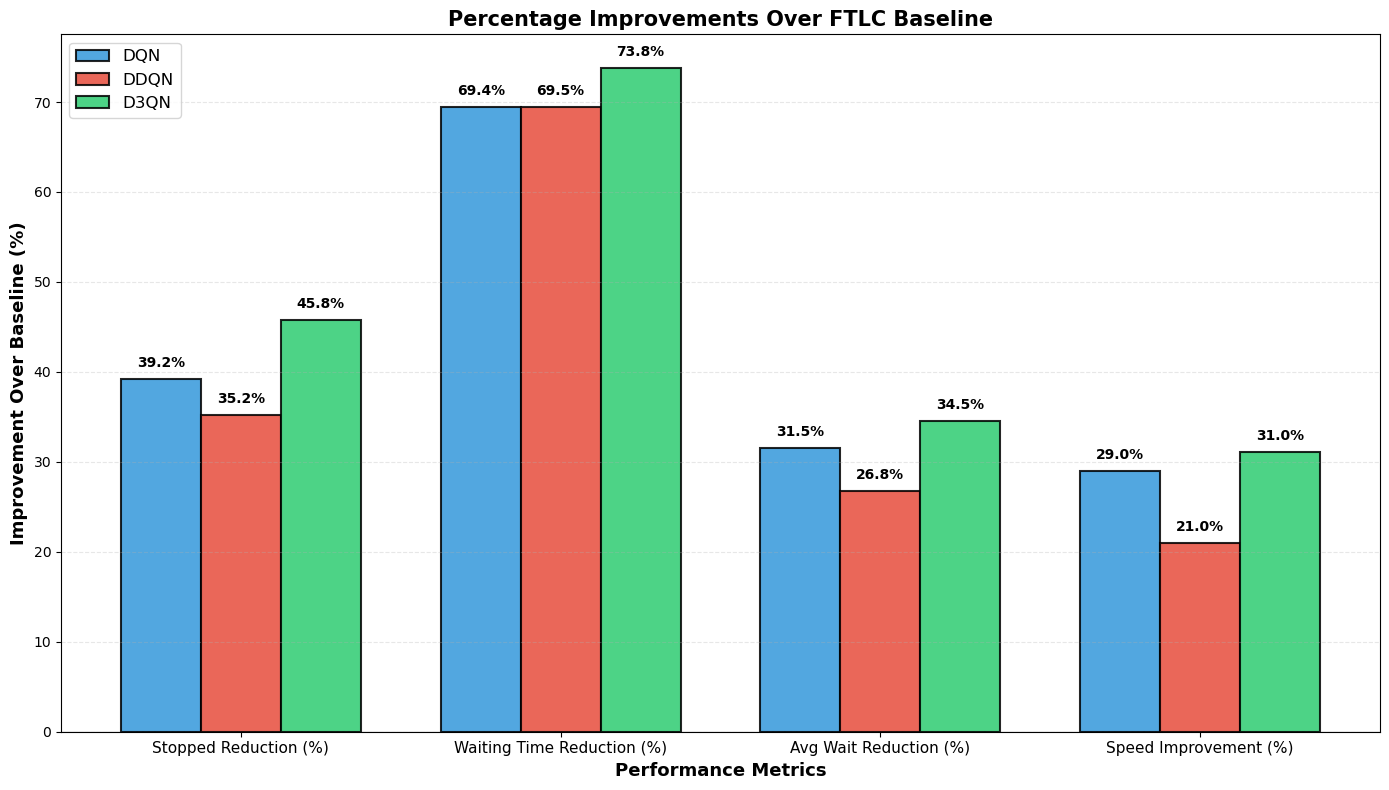

In [23]:
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(improvements_df.columns))
width = 0.25
colors_improve = ['#3498db', '#e74c3c', '#2ecc71']

for i, algo in enumerate(improvements_df.index):
    values = improvements_df.loc[algo].values
    ax.bar(x + i*width, values, width, label=algo, color=colors_improve[i], 
           alpha=0.85, edgecolor='black', linewidth=1.5)
    
    # Add value labels
    for j, v in enumerate(values):
        ax.text(x[j] + i*width, v + 1, f'{v:.1f}%', ha='center', va='bottom', 
               fontweight='bold', fontsize=10)

ax.set_xlabel('Performance Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Improvement Over Baseline (%)', fontsize=13, fontweight='bold')
ax.set_title('Percentage Improvements Over FTLC Baseline', fontsize=15, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(improvements_df.columns, fontsize=11)
ax.legend(fontsize=12, loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

plt.tight_layout()
plt.savefig('02_improvement_percentages.png', dpi=300, bbox_inches='tight')

**6. FIGURE 3: Mean Waiting Time Over Simulation Steps**

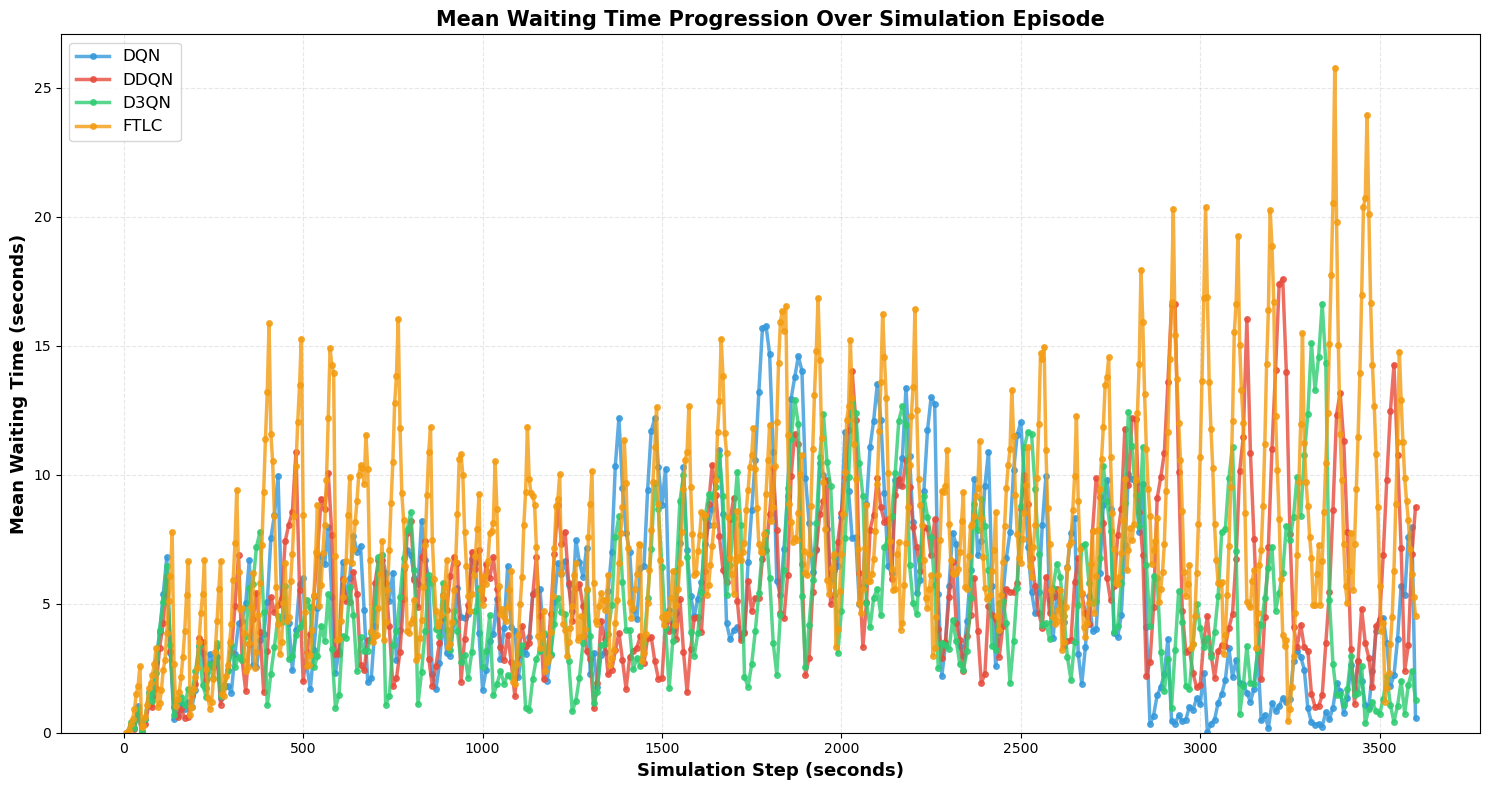

In [24]:

fig, ax = plt.subplots(figsize=(15, 8))

for algo_name, color in zip(['DQN', 'DDQN', 'D3QN', 'FTLC'], 
                             ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']):
    df = algorithms[algo_name]
    ax.plot(df['step'], df['system_mean_waiting_time'], label=algo_name, 
           linewidth=2.5, marker='o', markersize=4, color=color, alpha=0.8)

ax.set_xlabel('Simulation Step (seconds)', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean Waiting Time (seconds)', fontsize=13, fontweight='bold')
ax.set_title('Mean Waiting Time Progression Over Simulation Episode', fontsize=15, fontweight='bold')
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.savefig('03_waiting_time_progression.png', dpi=300, bbox_inches='tight')


**7. FIGURE 4: Box Plot Comparison**

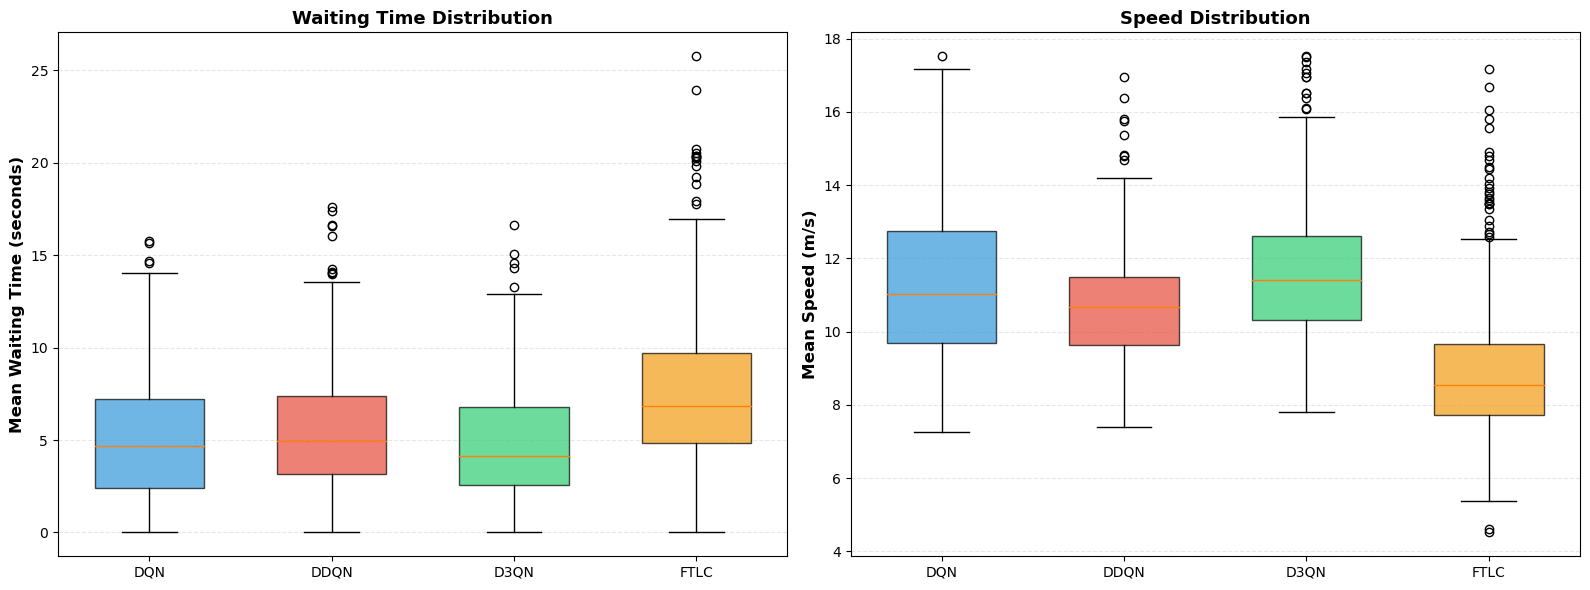

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Prepare data for box plots
wait_data = [dqn_df['system_mean_waiting_time'].values,
            ddqn_df['system_mean_waiting_time'].values,
            d3qn_df['system_mean_waiting_time'].values,
            ftlc_df['system_mean_waiting_time'].values]

speed_data = [dqn_df['system_mean_speed'].values,
             ddqn_df['system_mean_speed'].values,
             d3qn_df['system_mean_speed'].values,
             ftlc_df['system_mean_speed'].values]

# Box plot for waiting time
bp1 = axes[0].boxplot(wait_data, labels=['DQN', 'DDQN', 'D3QN', 'FTLC'],
                       patch_artist=True, widths=0.6)
for patch, color in zip(bp1['boxes'], ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0].set_ylabel('Mean Waiting Time (seconds)', fontsize=12, fontweight='bold')
axes[0].set_title('Waiting Time Distribution', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

# Box plot for speed
bp2 = axes[1].boxplot(speed_data, labels=['DQN', 'DDQN', 'D3QN', 'FTLC'],
                       patch_artist=True, widths=0.6)
for patch, color in zip(bp2['boxes'], ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1].set_ylabel('Mean Speed (m/s)', fontsize=12, fontweight='bold')
axes[1].set_title('Speed Distribution', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('04_distribution_boxplots.png', dpi=300, bbox_inches='tight')

**8. FIGURE 5: Stopped Vehicles Over Time**

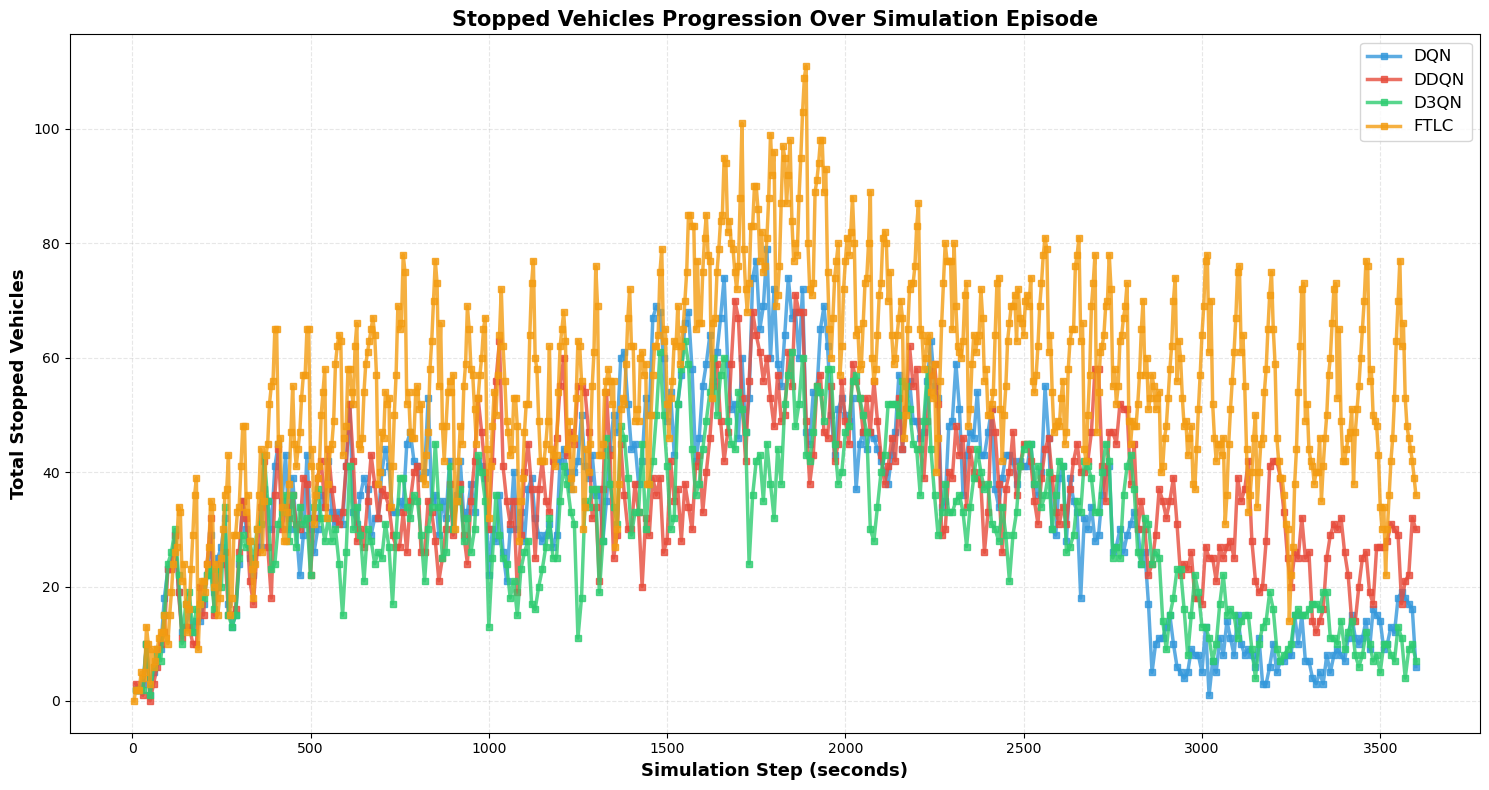

In [26]:
fig, ax = plt.subplots(figsize=(15, 8))

for algo_name, color in zip(['DQN', 'DDQN', 'D3QN', 'FTLC'], 
                             ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']):
    df = algorithms[algo_name]
    ax.plot(df['step'], df['system_total_stopped'], label=algo_name, 
           linewidth=2.5, marker='s', markersize=4, color=color, alpha=0.8)

ax.set_xlabel('Simulation Step (seconds)', fontsize=13, fontweight='bold')
ax.set_ylabel('Total Stopped Vehicles', fontsize=13, fontweight='bold')
ax.set_title('Stopped Vehicles Progression Over Simulation Episode', fontsize=15, fontweight='bold')
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('05_stopped_vehicles_progression.png', dpi=300, bbox_inches='tight')


**9. FIGURE 6: Average Speed Over Time**

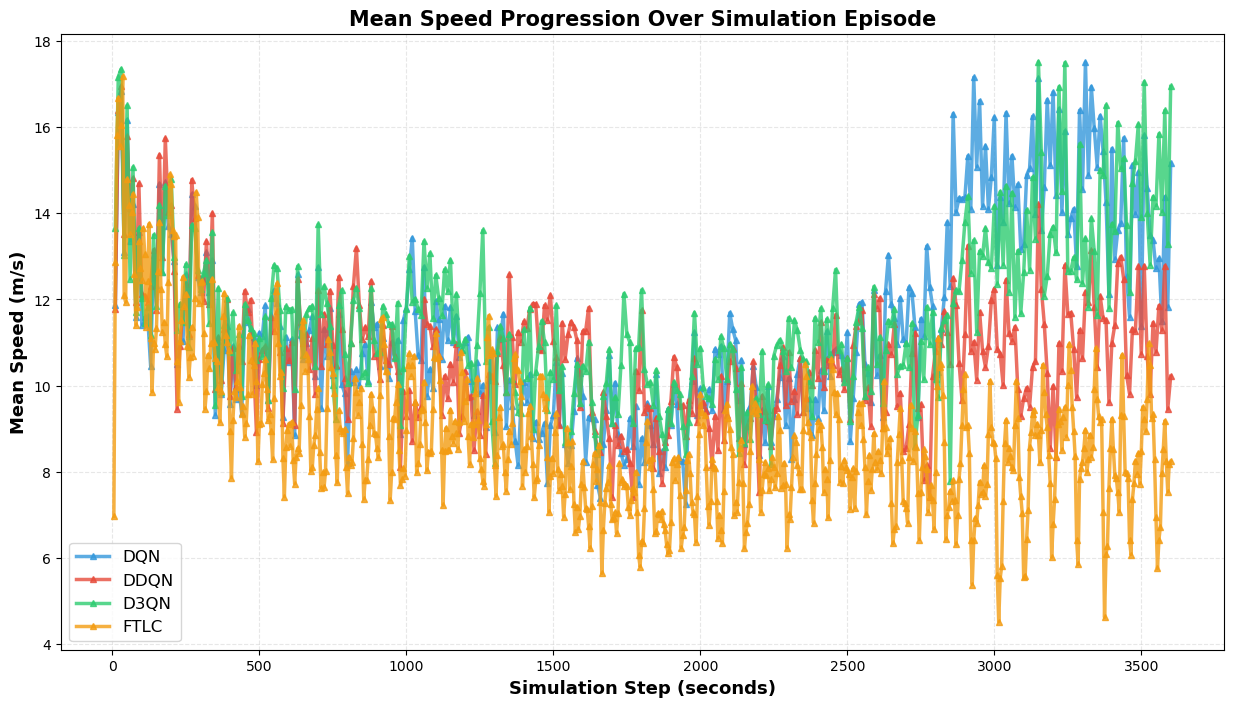

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))

for algo_name, color in zip(['DQN', 'DDQN', 'D3QN', 'FTLC'], 
                             ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']):
    df = algorithms[algo_name]
    ax.plot(df['step'], df['system_mean_speed'], label=algo_name, 
           linewidth=2.5, marker='^', markersize=4, color=color, alpha=0.8)

ax.set_xlabel('Simulation Step (seconds)', fontsize=13, fontweight='bold')
ax.set_ylabel('Mean Speed (m/s)', fontsize=13, fontweight='bold')
ax.set_title('Mean Speed Progression Over Simulation Episode', fontsize=15, fontweight='bold')
ax.legend(fontsize=12, loc='best')
ax.grid(True, alpha=0.3, linestyle='--')

plt.savefig('06_speed_progression.png', dpi=300, bbox_inches='tight')


**10. FIGURE 7: Multi-metric Dashboard**

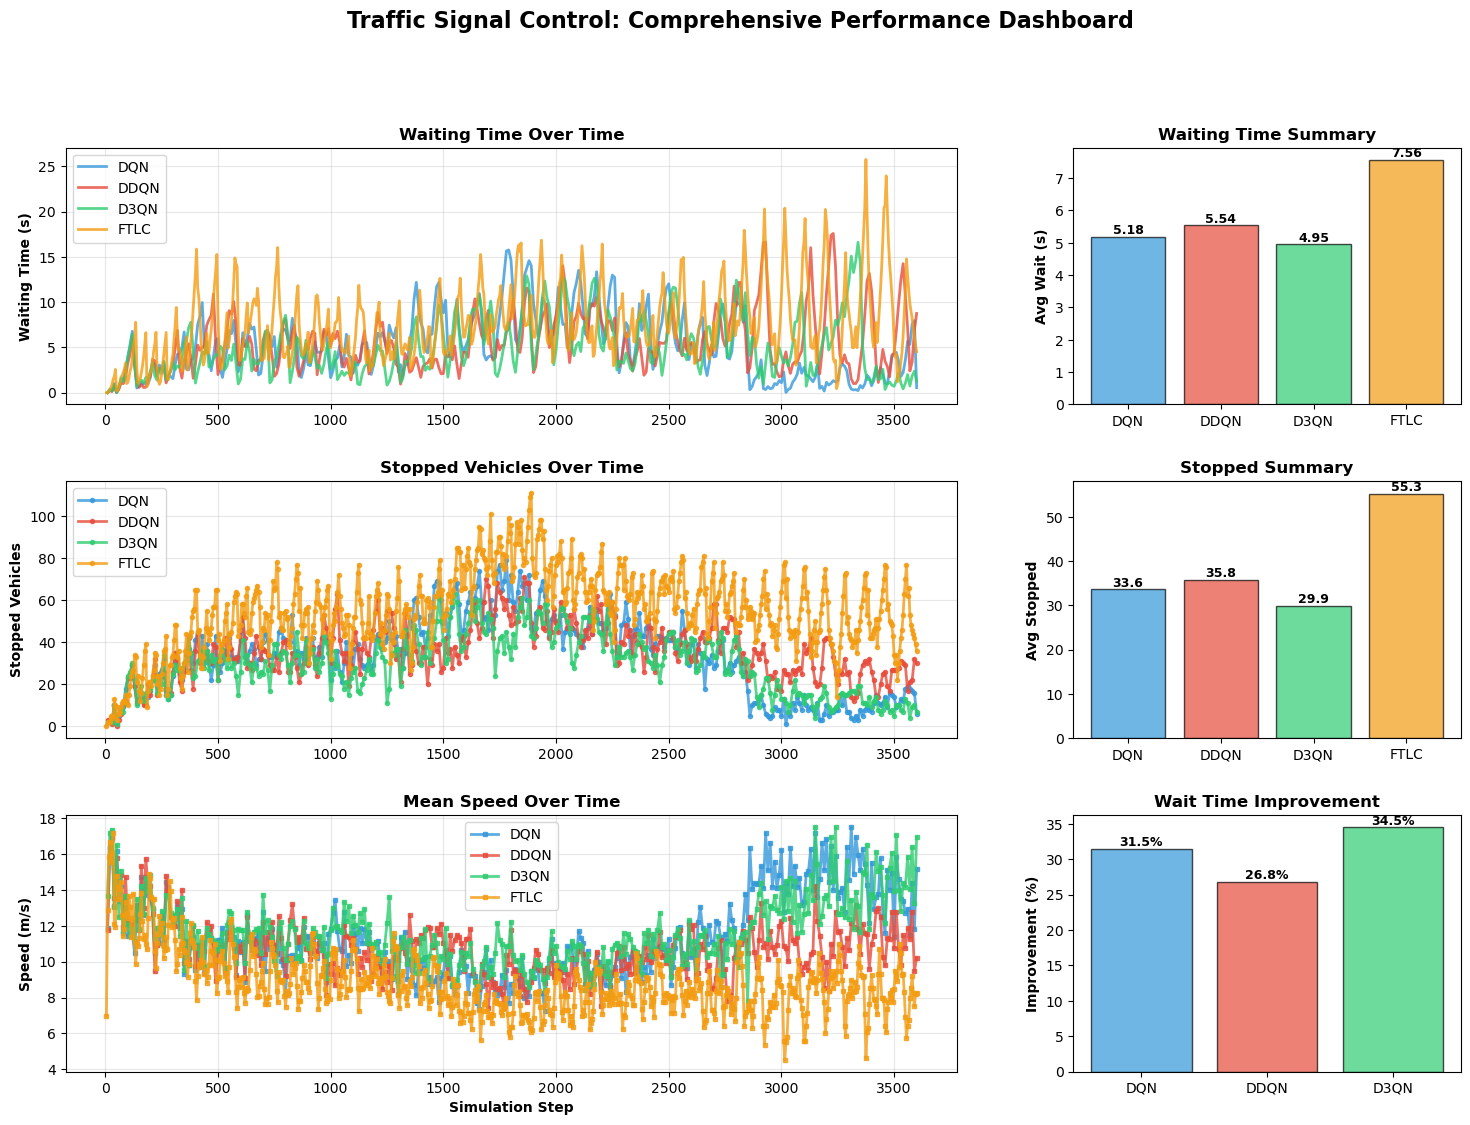

In [28]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

algorithms_short = ['DQN', 'DDQN', 'D3QN', 'FTLC']
colors_dash = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

# Row 1: Time series plots
ax1 = fig.add_subplot(gs[0, :2])
for algo_name, color in zip(algorithms_short, colors_dash):
    ax1.plot(algorithms[algo_name]['step'], 
            algorithms[algo_name]['system_mean_waiting_time'],
            label=algo_name, linewidth=2, color=color, alpha=0.8)
ax1.set_ylabel('Waiting Time (s)', fontweight='bold')
ax1.set_title('Waiting Time Over Time', fontweight='bold')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(gs[0, 2])
bar_data = [stats_df.loc[algo, 'Avg Waiting Time (sec)'] for algo in algorithms_short]
bars = ax2.bar(algorithms_short, bar_data, color=colors_dash, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Avg Wait (s)', fontweight='bold')
ax2.set_title('Waiting Time Summary', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Row 2: Stopped vehicles and speed
ax3 = fig.add_subplot(gs[1, :2])
for algo_name, color in zip(algorithms_short, colors_dash):
    ax3.plot(algorithms[algo_name]['step'], 
            algorithms[algo_name]['system_total_stopped'],
            label=algo_name, linewidth=2, color=color, alpha=0.8, marker='o', markersize=3)
ax3.set_ylabel('Stopped Vehicles', fontweight='bold')
ax3.set_title('Stopped Vehicles Over Time', fontweight='bold')
ax3.legend(loc='best')
ax3.grid(True, alpha=0.3)

ax4 = fig.add_subplot(gs[1, 2])
bar_data = [stats_df.loc[algo, 'Avg Stopped Vehicles'] for algo in algorithms_short]
bars = ax4.bar(algorithms_short, bar_data, color=colors_dash, alpha=0.7, edgecolor='black')
ax4.set_ylabel('Avg Stopped', fontweight='bold')
ax4.set_title('Stopped Summary', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Row 3: Speed and improvements
ax5 = fig.add_subplot(gs[2, :2])
for algo_name, color in zip(algorithms_short, colors_dash):
    ax5.plot(algorithms[algo_name]['step'], 
            algorithms[algo_name]['system_mean_speed'],
            label=algo_name, linewidth=2, color=color, alpha=0.8, marker='s', markersize=3)
ax5.set_xlabel('Simulation Step', fontweight='bold')
ax5.set_ylabel('Speed (m/s)', fontweight='bold')
ax5.set_title('Mean Speed Over Time', fontweight='bold')
ax5.legend(loc='best')
ax5.grid(True, alpha=0.3)

ax6 = fig.add_subplot(gs[2, 2])
improvements_rl = improvements_df['Avg Wait Reduction (%)'].values
bars = ax6.bar(['DQN', 'DDQN', 'D3QN'], improvements_rl, color=colors_dash[:3], 
              alpha=0.7, edgecolor='black')
ax6.set_ylabel('Improvement (%)', fontweight='bold')
ax6.set_title('Wait Time Improvement', fontweight='bold')
for bar in bars:
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold', fontsize=9)

fig.suptitle('Traffic Signal Control: Comprehensive Performance Dashboard', 
            fontsize=16, fontweight='bold', y=0.995)

plt.savefig('07_comprehensive_dashboard.png', dpi=300, bbox_inches='tight')


**11. Per-Agent Analysis**

In [29]:
df.columns

Index(['step', 'system_total_stopped', 'system_total_waiting_time',
       'system_mean_waiting_time', 'system_mean_speed', '1869716862_stopped',
       '1869716862_accumulated_waiting_time', '1869716862_average_speed',
       '249783293_stopped', '249783293_accumulated_waiting_time',
       '249783293_average_speed', '249783302_stopped',
       '249783302_accumulated_waiting_time', '249783302_average_speed',
       '249783308_stopped', '249783308_accumulated_waiting_time',
       '249783308_average_speed', '5681296953_stopped',
       '5681296953_accumulated_waiting_time', '5681296953_average_speed',
       'agents_total_stopped', 'agents_total_accumulated_waiting_time'],
      dtype='object')

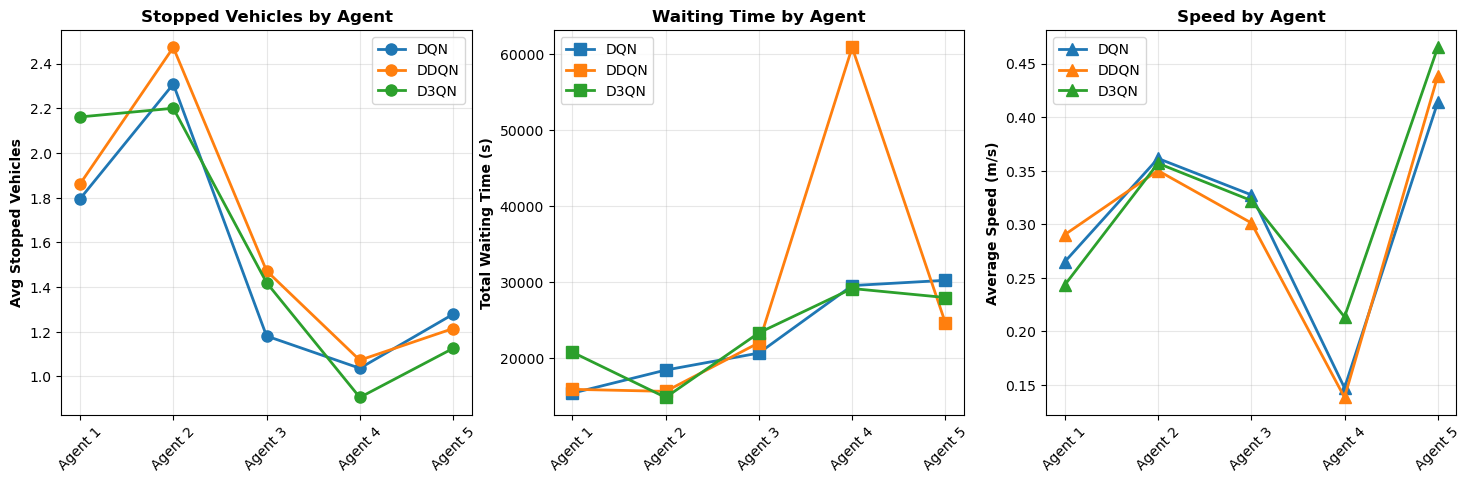

In [31]:
agents = ['1869716862', '249783293', '249783302', '249783308', '5681296953']

agent_analysis = {}
for algo_name in ['DQN', 'DDQN', 'D3QN']:
    agent_analysis[algo_name] = {}
    df = algorithms[algo_name]
    for agent in agents:
        agent_analysis[algo_name][agent] = {
            'avg_stopped': df[f'{agent}_stopped'].mean(),
            'total_waiting': df[f'{agent}_accumulated_waiting_time'].sum(),
            'avg_speed': df[f'{agent}_average_speed'].mean(),
        }

# FIGURE 8: Per-Agent Comparison

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

agent_labels = [f'Agent {i+1}' for i in range(5)]

# Stopped vehicles per agent
for idx, algo in enumerate(['DQN', 'DDQN', 'D3QN']):
    stopped_vals = [agent_analysis[algo][agent]['avg_stopped'] for agent in agents]
    axes[0].plot(agent_labels, stopped_vals, marker='o', linewidth=2, 
                label=algo, markersize=8)

axes[0].set_ylabel('Avg Stopped Vehicles', fontweight='bold')
axes[0].set_title('Stopped Vehicles by Agent', fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Waiting time per agent
for idx, algo in enumerate(['DQN', 'DDQN', 'D3QN']):
    wait_vals = [agent_analysis[algo][agent]['total_waiting'] for agent in agents]
    axes[1].plot(agent_labels, wait_vals, marker='s', linewidth=2, 
                label=algo, markersize=8)

axes[1].set_ylabel('Total Waiting Time (s)', fontweight='bold')
axes[1].set_title('Waiting Time by Agent', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Speed per agent
for idx, algo in enumerate(['DQN', 'DDQN', 'D3QN']):
    speed_vals = [agent_analysis[algo][agent]['avg_speed'] for agent in agents]
    axes[2].plot(agent_labels, speed_vals, marker='^', linewidth=2, 
                label=algo, markersize=8)

axes[2].set_ylabel('Average Speed (m/s)', fontweight='bold')
axes[2].set_title('Speed by Agent', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.savefig('08_per_agent_analysis.png', dpi=300, bbox_inches='tight')
